<a href="https://colab.research.google.com/github/david91107/predict_sklearn/blob/main/DTC_model_post_process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Jupyter notebook, I present a sophisticated AI model designed to identify and quantify the key factors contributing to customer churn in subscription-based services. This model epitomizes my adeptness in leveraging advanced machine learning techniques and data analytics to solve real-world business problems. By meticulously preprocessing the dataset, employing feature engineering, and experimenting with various machine learning algorithms, I have developed a model that not only predicts churn with high accuracy but also provides insightful interpretations of the underlying causes. This project demonstrates my proficiency in Python programming, deep understanding of predictive modeling, and ability to translate complex data insights into actionable business strategies. It stands as a testament to my capacity to add value in a Data Science role, where analytical rigor and practical problem-solving skills are paramount.

# Predictive churn model for a subscription service.

1.   Project Introduction
*   Overview of the project goal
*   Importance of churn prediction in subscription-based service
<br>
<br>
2.   Data Ingestion

*   Sourcing the data (APIs, databases, CSV files, etc.)
*   Loading data into the environment
*   Data Cleaning and Preprocessing
<br>
<br>
3.   Handling missing values
*   Data type conversion (if necessary)
*   Outlier detection and treatment
*   Exploratory Data Analysis (EDA)
<br>
<br>
4.   Statistical summaries of the dataset
*   Visualization of key metrics and relationships
*   Initial insights and identification of potential predictors of churn
*   Feature Engineering
<br>
<br>
5.   Creation of new features based on existing data
*   Feature transformation (scaling, encoding categorical variables, etc.)
*   Feature selection for the model
<br>
<br>
6.   Model Selection
*   Overview of candidate machine learning models
*   Criteria for model selection (accuracy, interpretability, etc.)
<br>
<br>
7.   Model Training and Validation
*   Splitting data into training and testing sets
*   Model training and hyperparameter tuning
*   Model validation and performance assessment (using metrics like accuracy, precision, recall, F1-score, ROC-AUC, etc.)
<br>
<br>
8.   Model Interpretation and Insights
*   Importance of features in the model
*   Interpretation of the model’s predictions
*   Business insights drawn from the model’s results
<br>
<br>
9.   Conclusion and Recommendations
*   Summary of findings
*   Potential strategies to reduce customer churn based on insights
*   Future work and improvements for the model
<br>
<br>
10.   Appendices and References
*   Code documentation
*   References to libraries and frameworks used
*   Additional resources

##Project Introduction

The project uses commercial data from a subscription service to indentify factors and their importance in reducing customer service cancellations (aka, "churn"). Where possible, this project will leverage scikit-learn.

##Model Selection

Mutiple models where consdiered for this project. Given the constraints of low compute costs, small dataset, imbalanced class and the need to identify feature weights, the following models were used:

*   Logistic Regression<br>
Pros: With a small dataset and limited compute resources, logistic regression is a great starting point due to its simplicity and low computational cost. It also provides direct insight into feature importance.<br>
Cons: Its linear nature might not capture complex relationships.<br>
<br>
*   Decision Trees<br>
Pros: They are relatively simple to understand and can provide clear insights into which features are most important in predicting churn.<br>
Cons: Prone to overfitting, especially with small datasets.<br>
<br>
*   Random Forest<br>
Pros: Can handle imbalanced classes better than many models and provides feature importance. It's also less likely to overfit compared to a single decision tree.<br>
Cons: More computationally intensive than logistic regression or a single decision<br>
<br>
*   Gradient Boosting Machines <br>
Pros: Often more effective than random forests, especially with small datasets. Provides feature importance.<br>
Cons: Can be computationally expensive and prone to overfitting.<br>
<br>

Results for all models are shown and compared below.

##Data Ingestion

In [1]:
# Create python enviornment

# Install libraries

!pip install --upgrade pip
!pip install scikit-learn
!pip install pandas==1.5.3 # to be compatible with google-colab 1.0.0
!pip install matplotlib
!pip install shap

# Install methods

import warnings
warnings.filterwarnings('ignore', category=FutureWarning) # Ignore FutureWarning

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import f_oneway

from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, roc_curve,roc_auc_score, accuracy_score,f1_score

import shap as shap
from shap import TreeExplainer, summary_plot

from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import RFE


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 11.6 MB/s eta 0:00:00


In [2]:
# Load CSV data file into a dataframe

df_pre = pd.read_csv(r'/content/drive/MyDrive/Data_sets/telco_subscription_data.csv')

# Check data load

df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134575 entries, 0 to 134574
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   random_key                 134575 non-null  int64  
 1   target                     134575 non-null  int64  
 2   customer_demo_age          134575 non-null  int64  
 3   customer_demo_geography_1  134575 non-null  int64  
 4   customer_demo_geography_2  134575 non-null  int64  
 5   sales_channel              134575 non-null  int64  
 6   sales_team                 134575 non-null  int64  
 7   sales_program              134575 non-null  int64  
 8   product_sku                134575 non-null  int64  
 9   product_cpe                134575 non-null  int64  
 10  product_operations_kpi1    132071 non-null  float64
 11  product_operations_kpi2    134575 non-null  int64  
 12  product_usage_kpi1         134575 non-null  int64  
 13  product_usage_kpi2         13

In [3]:
# Address null values

# Look for Nulls

df_pre.info()

# Drop Nulls

df_pre.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134575 entries, 0 to 134574
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   random_key                 134575 non-null  int64  
 1   target                     134575 non-null  int64  
 2   customer_demo_age          134575 non-null  int64  
 3   customer_demo_geography_1  134575 non-null  int64  
 4   customer_demo_geography_2  134575 non-null  int64  
 5   sales_channel              134575 non-null  int64  
 6   sales_team                 134575 non-null  int64  
 7   sales_program              134575 non-null  int64  
 8   product_sku                134575 non-null  int64  
 9   product_cpe                134575 non-null  int64  
 10  product_operations_kpi1    132071 non-null  float64
 11  product_operations_kpi2    134575 non-null  int64  
 12  product_usage_kpi1         134575 non-null  int64  
 13  product_usage_kpi2         13

In [4]:
# Check for any duplication

print("Number of duplicate rows:", df_pre.duplicated().sum())

Number of duplicate rows: 0


In [5]:
# Some of the int values are actually string values
# that will need to be flattened

columns_to_cast = ['sales_team', 'sales_channel','sales_program','product_sku','product_cpe','customer_demo_geography_1','customer_demo_geography_2']

df_pre[columns_to_cast] = df_pre[columns_to_cast].astype(object)

# Some of the float64 values are actually int values
# that will need to be flattened

# Define a list of column names to cast
columns_to_cast = ['product_operations_kpi1']

# Cast the columns
df_pre[columns_to_cast] = df_pre[columns_to_cast].astype(int)

## Explority Data Analysis

Source data has exensive inbalance, particularly in the target value (boolean for the account status whre 1 = churn, and 0 = active). Features appear to be largely independet as shown by Perason and VIF.

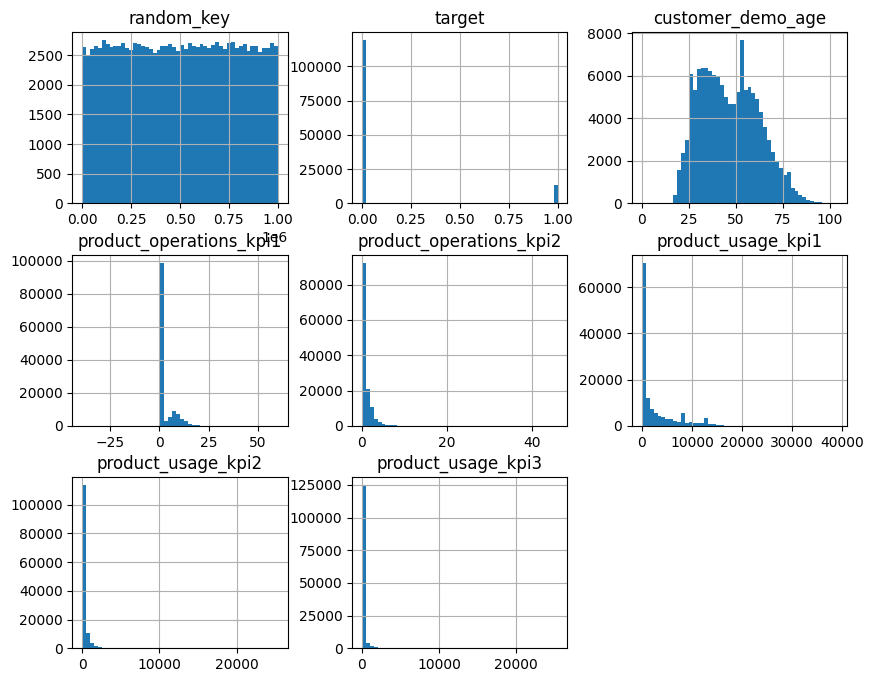

In [6]:
# Exploratory plots

df_pre.hist(bins=50, figsize=(10, 8))
plt.show()

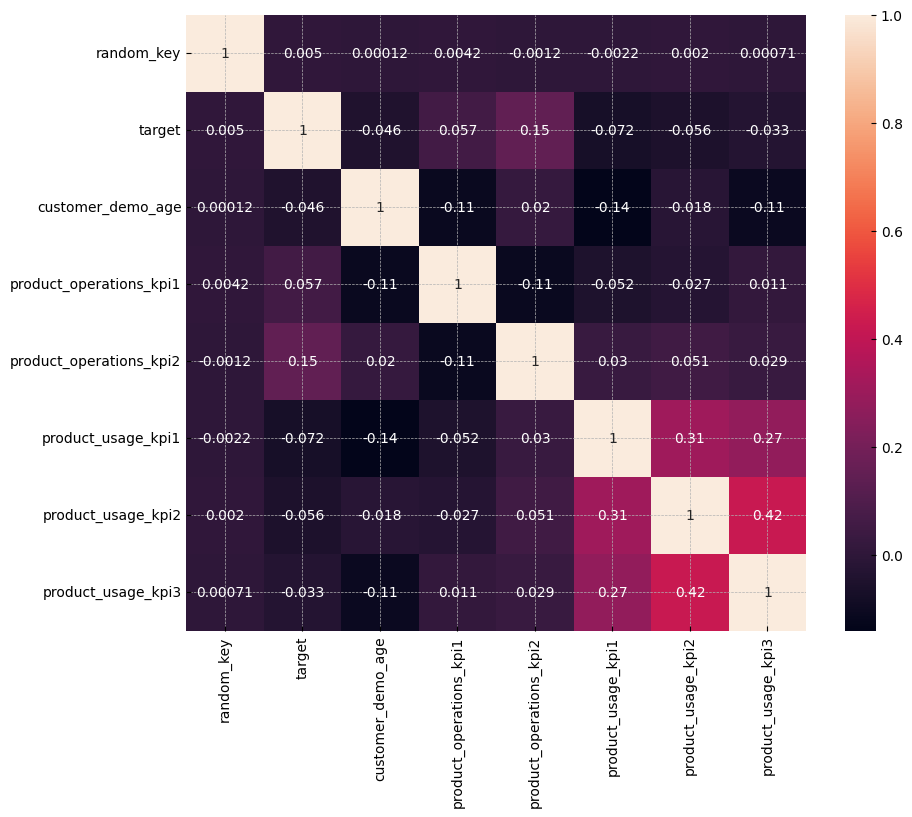

In [7]:
# Collinearity: Pearson

df_num = df_pre.select_dtypes(include = ['float64', 'int64'])

plt.style.use('bmh')
plt.figure(figsize=(10, 8))

corrMatrix = df_num.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [8]:
# Collinearity: VIF

df_num = df_pre.select_dtypes(include = ['float64', 'int64'])

# Calculate VIF for each numeric feature
vif = pd.DataFrame()
vif["Feature"] = df_num.columns
vif["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]

# Print the VIF values to identify multicollinearity among numeric features
print("VIF Values for Numeric Features:")
print(vif)

VIF Values for Numeric Features:
                   Feature       VIF
0               random_key  3.281181
1                   target  1.140411
2        customer_demo_age  3.585833
3  product_operations_kpi1  1.495137
4  product_operations_kpi2  1.248218
5       product_usage_kpi1  1.589605
6       product_usage_kpi2  1.536839
7       product_usage_kpi3  1.364883


## Prepare Dataset

Preliminary feature reduction efforts require numeric data. Features with string values will be flattened, and features with continuous numeric values will be normalized.

In [9]:
unique_counts_per_column = df_pre.nunique()

print(unique_counts_per_column)

random_key                   123692
target                            2
customer_demo_age                86
customer_demo_geography_1        50
customer_demo_geography_2      5307
sales_channel                     4
sales_team                       22
sales_program                    20
product_sku                       3
product_cpe                      18
product_operations_kpi1          56
product_operations_kpi2          27
product_usage_kpi1            14209
product_usage_kpi2             3439
product_usage_kpi3             2634
dtype: int64


Numerical, continuous data (product_usage_kpi1, product_operations_kpi1) have a high unique count and should not present a problem. However, the categorical features with high unique value counts (customer_demo_geography_2) may be an issue. For how this value will be dropped. After the inital data is analyzed customer_demo_geography_2 will be re-investigated for value.

In [10]:
# Drop features

df_pre.drop(columns='random_key', inplace=True) # used initially to identify duplicates
df_pre.drop(columns='customer_demo_geography_2', inplace=True)

In [11]:
# Normalize continuous features

columns_to_norm = ['product_usage_kpi1','product_usage_kpi2', 'product_usage_kpi3','product_operations_kpi1','product_operations_kpi2']

for column in columns_to_norm:
  df_pre[column] = df_pre[column] / df_pre[column].abs().max()

In [12]:
# Bin age into generations
# Assumption is that trends fall along generations more than specific ages
# https://www.beresfordresearch.com/age-range-by-generation/

df_pre['customer_demo_age_gen'] = df_pre['customer_demo_age'].apply(lambda age:
    'gen_z' if age >= 12 and age <= 27 else
    'millennial' if age >= 28 and age <= 43 else
    'gen_x' if age >= 44 and age <= 59 else
    'boomers' if age >= 60 and age <= 78 else
    'post_war' if age >= 79 and age <= 96 else
    'invalid' if age < 18 and age > 99 else
    'other'
)

# Drop age
df_pre.drop('customer_demo_age', axis=1, inplace=True)

In [13]:
# Flatten categorical features

categorical_features = ['product_sku','sales_channel','sales_team','product_cpe','sales_program','customer_demo_age_gen','customer_demo_geography_1']

# Perform one-hot encoding (flattening) of the specified columns
df_pre = pd.get_dummies(df_pre, columns=categorical_features)

# Convert boolean values to integers (1 and 0)
df_pre = df_pre.astype(int)

In [14]:
# Initial feature counts

unique_column_names = set(df_pre.columns)
column_count = len(unique_column_names)
print(f"Total Features: {column_count}")

Total Features: 129


In [15]:
df_pre.head()

,target,product_operations_kpi1,product_operations_kpi2,product_usage_kpi1,product_usage_kpi2,product_usage_kpi3,product_sku_0,product_sku_1,product_sku_2,sales_channel_0,...,customer_demo_geography_1_40,customer_demo_geography_1_41,customer_demo_geography_1_42,customer_demo_geography_1_43,customer_demo_geography_1_44,customer_demo_geography_1_45,customer_demo_geography_1_46,customer_demo_geography_1_47,customer_demo_geography_1_48,customer_demo_geography_1_49
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
import pandas as pd
from scipy.stats import f_oneway

# Perform ANOVA tests for each feature and reduce features
alpha = 0.05
anova_results = []
features_to_drop = []
target_variable = 'target'

for feature_column in df_pre.columns:
    if feature_column != target_variable:
        # Group data by target variable and perform ANOVA
        grouped_data = [group[1] for group in df_pre.groupby(target_variable)[feature_column]]
        f_statistic, p_value = f_oneway(*grouped_data)
        if p_value >= alpha:
            significance = 'Not Significant'
            features_to_drop.append(feature_column)
        else:
            significance = 'Significant'

        # Store the results
        anova_results.append([feature_column, f_statistic, p_value, significance])

# Drop non-significant features
df_pre.drop(columns=features_to_drop, inplace=True)

In [17]:
df_pre.head()

,target,product_operations_kpi2,product_sku_0,product_sku_1,product_sku_2,sales_channel_0,sales_channel_1,sales_channel_2,sales_channel_3,sales_team_1,...,customer_demo_geography_1_32,customer_demo_geography_1_33,customer_demo_geography_1_35,customer_demo_geography_1_36,customer_demo_geography_1_37,customer_demo_geography_1_41,customer_demo_geography_1_42,customer_demo_geography_1_43,customer_demo_geography_1_44,customer_demo_geography_1_45
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df_pre is your original DataFrame and 'target' is the column name of the target variable

# Extract the target variable and create X and y
y = df_pre['target']
X = df_pre.drop(columns=['target'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Specify the number of features to select (you can adjust this)
num_features_to_select = 12

# Create the RFE model
rfe = RFE(estimator=clf, n_features_to_select=num_features_to_select)

# Fit the RFE model to the training data
rfe.fit(X_train, y_train)

# Get the selected feature names
selected_feature_names = X.columns[rfe.support_]

# Print the names of the selected features
print("Selected feature names:", selected_feature_names.tolist())

# Filter both the training and test sets using the selected features
X_train_selected = X_train[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

# Train and evaluate your model using the selected features and the test data
clf.fit(X_train_selected, y_train)
accuracy = clf.score(X_test_selected, y_test)
print(f"Accuracy on test data with selected features: {accuracy:.2f}")

# Create a final DataFrame including the selected features and the target variable
df_final = df_pre[selected_feature_names].copy()
df_final['target'] = y


Selected feature names: ['product_sku_0', 'product_sku_2', 'sales_channel_0', 'sales_team_3', 'sales_team_17', 'product_cpe_6', 'product_cpe_7', 'sales_program_8', 'sales_program_18', 'customer_demo_age_gen_boomers', 'customer_demo_geography_1_3', 'customer_demo_geography_1_8']
Accuracy on test data with selected features: 0.90


In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132071 entries, 0 to 134574
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   product_sku_0                  132071 non-null  int64
 1   product_sku_2                  132071 non-null  int64
 2   sales_channel_0                132071 non-null  int64
 3   sales_team_3                   132071 non-null  int64
 4   sales_team_17                  132071 non-null  int64
 5   product_cpe_6                  132071 non-null  int64
 6   product_cpe_7                  132071 non-null  int64
 7   sales_program_8                132071 non-null  int64
 8   sales_program_18               132071 non-null  int64
 9   customer_demo_age_gen_boomers  132071 non-null  int64
 10  customer_demo_geography_1_3    132071 non-null  int64
 11  customer_demo_geography_1_8    132071 non-null  int64
 12  target                         132071 non-null  int64
dtyp

In [20]:
# Feature count after reduction
unique_column_names = set(df_final.columns)
column_count = len(unique_column_names)
print(f"Total Features: {column_count}")

Total Features: 13


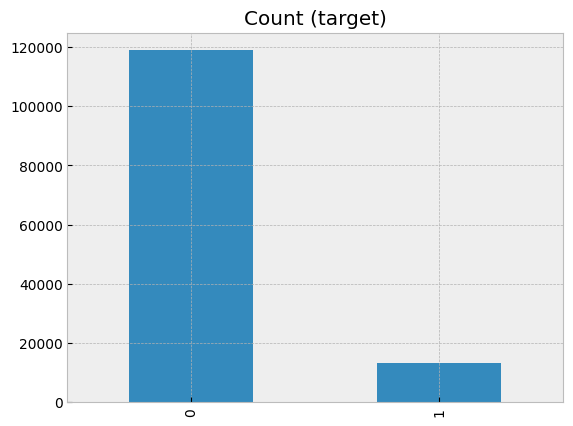

<Figure size 1000x800 with 0 Axes>

In [21]:
# Address class imbalance of the target

df_final.target.value_counts().plot(kind='bar', title='Count (target)')

plt.style.use('bmh')
plt.figure(figsize=(10, 8))

plt.show()

Random over-sampling:
0    118901
1    118901
Name: target, dtype: int64


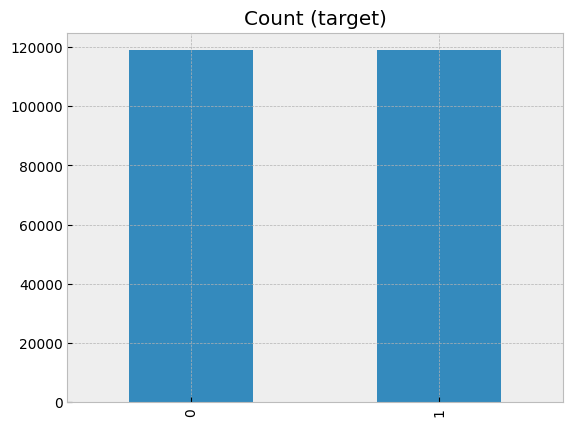

<Figure size 1000x800 with 0 Axes>

In [22]:
# Oversample the minority class using "random over sampling"
# This linear approach supports cleaner interpetation of
# feature importance.

count_class_0, count_class_1 = df_final.target.value_counts()

# Divide by class
df_class_0 = df_final[df_final['target'] == 0] #majority class
df_class_1 = df_final[df_final['target'] == 1] #minority class

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over.target.value_counts())

df_over.target.value_counts().plot(kind='bar', title='Count (target)')

plt.style.use('bmh')
plt.figure(figsize=(10, 8))

plt.show()

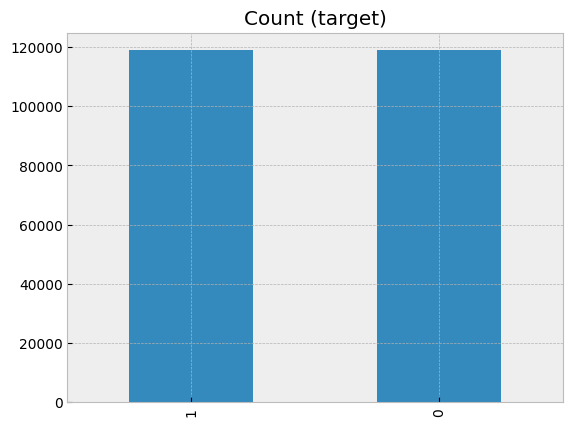

In [23]:
# Shuffle the array before train/test split

df_over = shuffle(df_over,random_state=0)
df_over.target.value_counts().plot(kind='bar', title='Count (target)');

In [24]:
# Train/test splits

X, y = df_over, df_over.pop("target")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)#, random_state=42)

## Create Models

### Logistic Regression

In [25]:
# For Decision Tree Classifier

df_lr = df_final.copy()

In [26]:
#Create Logistic Regression object

from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

In [27]:
# Fit and score the model

model_lr.fit(X_train, y_train.values)
score_train = model_lr.score(X_train, y_train)
print("score_train: ", score_train)

score_train:  0.7376748440136458


In [28]:
# Confusion matrix

y_pred = model_lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.67      0.72     23828
           1       0.71      0.81      0.75     23733

    accuracy                           0.74     47561
   macro avg       0.74      0.74      0.74     47561
weighted avg       0.74      0.74      0.74     47561



>1, train: 0.719, test: 0.719
>2, train: 0.737, test: 0.736
>3, train: 0.737, test: 0.736
>4, train: 0.740, test: 0.739
>5, train: 0.743, test: 0.743
>6, train: 0.748, test: 0.748
>7, train: 0.749, test: 0.748
>8, train: 0.749, test: 0.748
>9, train: 0.749, test: 0.750
>10, train: 0.749, test: 0.750
>11, train: 0.749, test: 0.750
>12, train: 0.750, test: 0.750
>13, train: 0.750, test: 0.750
>14, train: 0.750, test: 0.750


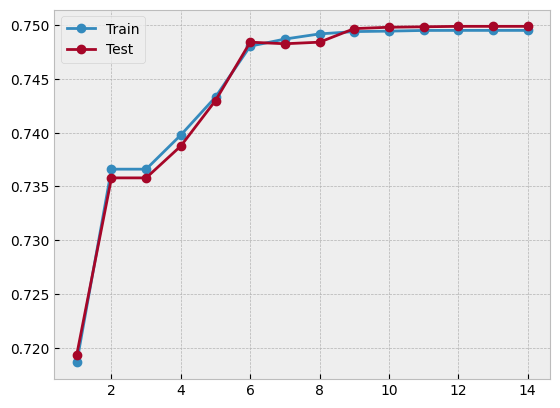

In [29]:
# Look for overfitting via Accuracy

# Define the tree depths to evaluate
values = [i for i in range(1, 15)]

# Define lists to collect scores
train_scores, test_scores = list(), list()

# Evaluate for each depth
for i in values:

  # configure the model
  model_lr = DecisionTreeClassifier(max_depth=i)

    # fit model on the training dataset
  model_lr.fit(X_train, y_train)

  # evaluate on the train dataset
  train_yhat = model_lr.predict(X_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_scores.append(train_acc)

  # evaluate on the test dataset
  test_yhat = model_lr.predict(X_test)
  test_acc = accuracy_score(y_test, test_yhat)
  test_scores.append(test_acc)

# summarize progress
  print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

Churn: ROC AUC=0.500
Logistic: ROC AUC=0.828


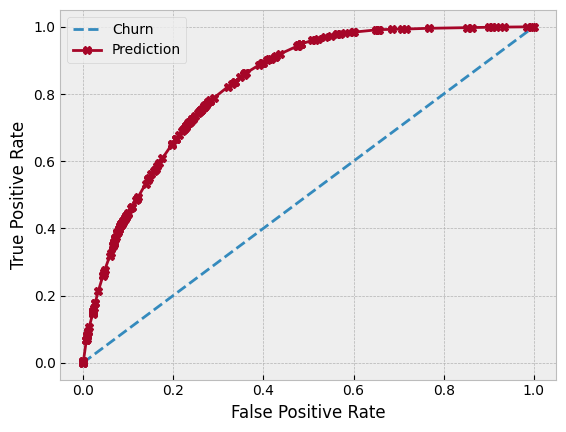

In [30]:
# ROC curve and AUC

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = model_lr.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('Churn: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Churn')
plt.plot(lr_fpr, lr_tpr, marker='X', label='Prediction')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

###Decision Tree Classification

In [31]:
# For Decision Tree Classifier

df_dtc = df_final.copy()

In [32]:
#Create Decision Tree classifer object

from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier()

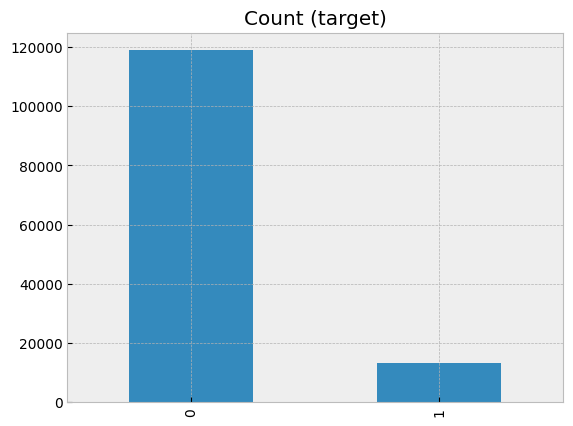

<Figure size 1000x800 with 0 Axes>

In [33]:
# Address class imbalance of the target

df_dtc.target.value_counts().plot(kind='bar', title='Count (target)')

plt.style.use('bmh')
plt.figure(figsize=(10, 8))

plt.show()

Random over-sampling:
0    118901
1    118901
Name: target, dtype: int64


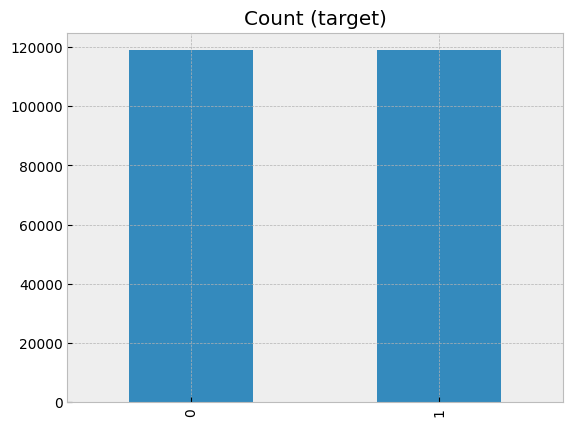

<Figure size 1000x800 with 0 Axes>

In [34]:
# Oversample the minority class using "random over sampling"
# This linear approach supports cleaner interpetation of
# feature importance.

count_class_0, count_class_1 = df_dtc.target.value_counts()

# Divide by class
df_class_0 = df_dtc[df_dtc['target'] == 0] #majority class
df_class_1 = df_dtc[df_dtc['target'] == 1] #minority class

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over.target.value_counts())

df_over.target.value_counts().plot(kind='bar', title='Count (target)')

plt.style.use('bmh')
plt.figure(figsize=(10, 8))

plt.show()

<Axes: title={'center': 'Count (target)'}>

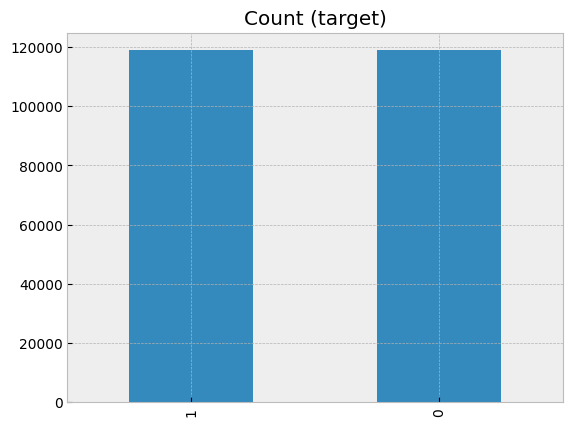

In [35]:
# Shuffle the array before train/test split

df_over = shuffle(df_over,random_state=0)
df_over.target.value_counts().plot(kind='bar', title='Count (target)')

In [36]:
# Train/test splits

X, y = df_over, df_over.pop("target")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)#, random_state=42)

In [37]:
# Fit and score the model

model_dtc.fit(X_train, y_train.values)
score_train = model_dtc.score(X_train, y_train)
print("score_train: ", score_train)

score_train:  0.7493757917588743


In [38]:
# Confusion matrix

y_pred = model_dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.70      0.74     23764
           1       0.73      0.80      0.76     23797

    accuracy                           0.75     47561
   macro avg       0.75      0.75      0.75     47561
weighted avg       0.75      0.75      0.75     47561



>1, train: 0.718, test: 0.722
>2, train: 0.736, test: 0.734
>3, train: 0.736, test: 0.734
>4, train: 0.740, test: 0.738
>5, train: 0.743, test: 0.741
>6, train: 0.747, test: 0.747
>7, train: 0.749, test: 0.748
>8, train: 0.749, test: 0.748
>9, train: 0.749, test: 0.748
>10, train: 0.749, test: 0.748
>11, train: 0.749, test: 0.748
>12, train: 0.749, test: 0.748
>13, train: 0.749, test: 0.748
>14, train: 0.749, test: 0.748


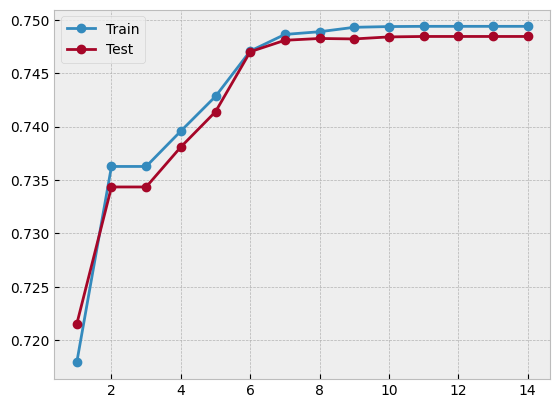

In [39]:
# Look for overfitting via Accuracy

# Define the tree depths to evaluate
values = [i for i in range(1, 15)]

# Define lists to collect scores
train_scores, test_scores = list(), list()

# Evaluate for each depth
for i in values:

  # configure the model
  model_dtc = DecisionTreeClassifier(max_depth=i)

    # fit model on the training dataset
  model_dtc.fit(X_train, y_train)

  # evaluate on the train dataset
  train_yhat = model_dtc.predict(X_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_scores.append(train_acc)

  # evaluate on the test dataset
  test_yhat = model_dtc.predict(X_test)
  test_acc = accuracy_score(y_test, test_yhat)
  test_scores.append(test_acc)

# summarize progress
  print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [40]:
# Get model parameters

model = DecisionTreeClassifier()
for parameter in model.get_params():
    print(parameter)

ccp_alpha
class_weight
criterion
max_depth
max_features
max_leaf_nodes
min_impurity_decrease
min_samples_leaf
min_samples_split
min_weight_fraction_leaf
random_state
splitter


In [ ]:
# Set hyper-parameter dictionary to tune the model

param_dict = {'criterion' :['gini', 'entropy'],
            'max_depth' :range(1,8),
            'min_samples_split' : range(20, 50, 10), # From Central Limit Theory
            'min_samples_leaf': range(20, 50, 10),
             'ccp_alpha' :[0.0001, 0.001, 0.01]}

tree_class = DecisionTreeClassifier()

grid = GridSearchCV(estimator=tree_class,
        param_grid = param_dict,
        cv = 5,
        verbose= 1,
        n_jobs = -1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 378 candidates, totalling 1890 fits


In [ ]:
# Extact the best preforming tested parameter values

grid.best_params_

In [ ]:
# Update model

model_dtc_p=DecisionTreeClassifier(ccp_alpha = 0.0001,
                                   criterion ='entropy',
                                   max_depth = 7,
                                   min_samples_split = 20,
                                   min_samples_leaf = 20)

In [ ]:
#Fit and re-score the model

model_dtc_p.fit(X_train, y_train.values)
score_train = model_dtc_p.score(X_test, y_test)
print("score_train: ", score_train)

In [ ]:
# Confusion matrix

y_pred = model_dtc_p.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cr)

In [ ]:
# Look again for overfitting via Accuracy


# Define the tree depths to evaluate
values = [i for i in range(1, 15)]

# Define lists to collect scores
train_scores, test_scores = list(), list()

# Evaluate for each depth
for i in values:

  # configure the model
  model_dtc_p = DecisionTreeClassifier(max_depth=i)

    # fit model on the training dataset
  model_dtc_p.fit(X_train, y_train)

  # evaluate on the train dataset
  train_yhat = model_dtc_p.predict(X_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_scores.append(train_acc)

  # evaluate on the test dataset
  test_yhat = model_dtc_p.predict(X_test)
  test_acc = accuracy_score(y_test, test_yhat)
  test_scores.append(test_acc)

# summarize progress
  print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [ ]:
# ROC curve and AUC

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = model_dtc_p.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('Churn: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Churn')
plt.plot(lr_fpr, lr_tpr, marker='X', label='Prediction')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

### Random Forrest Classifier

In [ ]:
# For Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

df_rfc = df_pre.copy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier
model_rfc = RandomForestClassifier()

In [ ]:
# Fit the model to the training data
model_rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_rfc.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
# Confusion matrix

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

y_pred = model_rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cr)

In [ ]:
# Look for any overfitting

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the tree depths to evaluate
values = [i for i in range(1, 10)]

# Define lists to collect scores
train_scores, test_scores = list(), list()

# Evaluate for each depth
for i in values:

    # Fit the model to the training data
    model_rfc.fit(X_train, y_train)

    # Evaluate on the train dataset
    train_yhat = model_rfc.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)

    # Evaluate on the test dataset
    test_yhat = model_rfc.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

    # Summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()

In [ ]:
# Get model parameters

for parameter in model_rfc.get_params():
    print(parameter)

In [ ]:
# Set hyper-parameter dictionary to tune the model
# and resolve any overfitting

from sklearn.model_selection import GridSearchCV

param_dict = {
    "criterion": ["gini", "entropy"], # Criterion used for RandomForestClassifier
    "max_depth": range(1, 5),
    'min_samples_split': range(20, 50, 10),
    'min_samples_leaf': range(20, 50, 10),
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider at every split
    'ccp_alpha': [0.0001, 0.001, 0.01] # Cost-complexity pruning parameter
}

tree_class = RandomForestClassifier()

grid = GridSearchCV(estimator=tree_class,
        param_grid = param_dict,
        cv = 10,
        verbose= 1,
        n_jobs = 1)

grid.fit(X_train, y_train)

## Gradient Boost


In [ ]:
# For Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier

df_gb = df_pre.copy()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize the Gradient Boosting Classifier
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

# Fit the model to the training data
model_gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


In [ ]:
# Confusion matrix

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

y_pred = model_gb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cr)

In [ ]:
# Look for any overfitting of the GB model

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the tree depths to evaluate
values = [i for i in range(1, 10)]

# Define lists to collect scores
train_scores, test_scores = list(), list()

# Evaluate for each depth
for i in values:
    # Initialize the Gradient Boosting Classifier with varying max_depth
    model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=i, random_state=0)

    # Fit the model to the training data
    gb_model.fit(X_train, y_train)

    # Evaluate on the train dataset
    train_yhat = gb_model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)

    # Evaluate on the test dataset
    test_yhat = gb_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

    # Summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()


In [ ]:
# Get model parameters

for parameter in model_gb.get_params():
    print(parameter)

In [ ]:
# Set hyper-parameter dictionary to tune the model
# and resolve any overfitting

from sklearn.model_selection import GridSearchCV

param_dict = {"criterion" :["friedman_mse", "squared_error"],
            "max_depth" :range(1,5),
            'min_samples_split' : range(20, 50, 10), # From Central Limit Theory
            'min_samples_leaf': range(20, 50, 10),
             'ccp_alpha' :[0.0001, 0.001, 0.01]}

tree_class = GradientBoostingClassifier()

grid = GridSearchCV(estimator=tree_class,
        param_grid = param_dict,
        cv = 10,
        verbose= 1,
        n_jobs = 1)

grid.fit(X_train, y_train)

In [ ]:
# Update model
model_gb_p=DecisionTreeClassifier(ccp_alpha = 0.0001,
                                   criterion ='entropy',
                                   max_depth = 7,
                                   min_samples_split = 20,
                                   min_samples_leaf = 20)

In [ ]:
#Fit and re-score the model

model_gb_p.fit(X_train, y_train.values.ravel())
score_train = model_gb_p.score(X_test, y_test)
print("score_train: ", score_train)

In [ ]:
# Confusion matrix

from sklearn.metrics import classification_report, confusion_matrix

y_pred = model_gb_p.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cr)

In [ ]:
# ROC curve and AUC
model_gb_p = GradientBoostingClassifier()

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# fit a model
#model = DecisionTreeClassifier()
model_gb_p.fit(X_train, y_train.values)

# predict probabilities
lr_probs = model_dtc_p.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('Churn: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Churn')
plt.plot(lr_fpr, lr_tpr, marker='X', label='Prediction')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

Gini Impurity
Pros:

Faster Computation: Gini impurity is computationally less intensive as it doesn't involve logarithmic calculations, which can be advantageous for large datasets.
Performance: It tends to work well in practice and is the default in many decision tree algorithms, like in scikit-learn's DecisionTreeClassifier.
Cons:

Less Sensitive to Changes in Class Probabilities: Gini impurity might be less sensitive to probability changes of the minority class, as it squares the probability terms.
Entropy (Information Gain)
Pros:

Sensitivity to Class Probability Changes: Entropy is more sensitive to changes in the class probabilities of the nodes, potentially leading to more balanced trees.
Information Theoretic Model: It has a basis in information theory, providing a clear interpretation in terms of information content and uncertainty.
Cons:

Computational Intensity: Calculating entropy involves logarithmic computations, which can be more computationally intensive than Gini impurity, especially for very large datasets.
Can Lead to Overfitting: In some cases, because entropy is more sensitive to class probabilities, it can lead to models that are more complex and potentially overfitted.

Bayesian-Optimization Library:

Pro: Offers a probabilistic model that can efficiently find the optimal parameters, especially useful when the number of experiments is limited.
Con: Might be less efficient in high-dimensional space and requires careful choice of the prior.
Scikit-Optimize:

Pro: Integrates seamlessly with scikit-learn and offers several methods including Bayesian optimization, which is useful for optimizing expensive-to-evaluate functions.
Con: Limited to optimization tasks and might not be as scalable as some other libraries.
GPyOpt:

Pro: Built on Gaussian Process models, it is excellent for fine-tuning where evaluations of the function are expensive.
Con: Can be slower and less practical for large-scale hyperparameter optimization due to the computational cost of Gaussian Processes.
Hyperopt:

Pro: Uses Bayesian optimization and supports parallelization, making it efficient for large searches.
Con: Can be complex to configure and understand, especially for beginners.
SHERPA:

Pro: Designed for hyperparameter tuning of machine learning models, supports a variety of algorithms, and is easy to use.
Con: Might not offer as wide a range of optimization algorithms compared to some other tools.
Optuna:

Pro: A modern library with an easy-to-use interface, it offers efficient and flexible optimization with visualization features.
Con: Its flexibility might come at the cost of a steeper learning curve for advanced features.
Ray Tune:

Pro: Highly scalable, supports a wide range of optimization algorithms, and integrates well with deep learning frameworks.
Con: Its broad functionality can make it more complex to set up and use.
Neural Network Intelligence (NNI):

Pro: Designed for neural networks, it offers a rich set of tuning strategies and easy integration with popular deep learning frameworks.
Con: More focused on neural networks, might be less applicable for other types of models.
MLMachine:

Pro: Provides an easy-to-use framework for machine learning workflows, including hyperparameter tuning.
Con: Less known and might lack some advanced features or optimizations found in more established libraries.
Talos:

Pro: Specifically designed for Keras models, making it very convenient for users of this framework.
Con: Limited to Keras, which might not be suitable if you're using different machine learning frameworks.
GridSearchCV:

Pro: Part of scikit-learn, very straightforward and easy to use for exhaustive search over specified parameter values.
Con: Computationally expensive as it evaluates all possible combinations and not efficient for large hyperparameter spaces.

##Statistical summaries of the dataset

##Model Interpretation and Insights

##Conclusion and Recommendations

##Appendices and References

## Ingest Data

## Data Cleansing

Selecting the appropriate value to plot train vs test to indenitfy potential ofverfitting.

**Accuracy**
<br>
<br>
Pros:
<br>
Simplicity: Accuracy is straightforward to understand and interpret. It's the percentage of correctly classified instances out of all instances.
Usefulness in Balanced Datasets: In cases where classes are balanced, accuracy can be a reliable measure of model performance.
<br>
<br>
Cons:
<br>
Misleading in Imbalanced Datasets: In situations where there is a significant class imbalance, accuracy can be misleading. A model could predict the majority class for all instances and still achieve high accuracy.
No Insight into Type I/II Errors: Accuracy doesn't distinguish between the types of errors (false positives and false negatives).
<br>
<br>
**F1-Score**
<br>
<br>
Pros:
<br>
Balance Between Precision and Recall: F1-score provides a balance between precision and recall. It is especially useful in cases where we need to balance false positives and false negatives.
Better for Imbalanced Datasets: It is more informative than accuracy in case of an imbalanced dataset.
<br>
<br>
Cons:
<br>
More Complex to Understand: F1-score is not as intuitive as accuracy, especially for non-technical stakeholders.
Not a Single Error Type Focus: If your specific problem requires optimizing specifically for either precision or recall (but not both), F1-score might not be the best metric.
<br>
<br>
**ROC-AUC**
<br>
<br>
Pros:
<br>
Performance Across Thresholds: AUC-ROC measures the model's performance across all classification thresholds, providing a comprehensive view of its effectiveness.
Useful for Imbalanced Datasets: Like F1-score, it is more informative than accuracy for imbalanced classes.
<br>
<br>
Cons:
<br>
Can Be Overly Optimistic: In highly imbalanced datasets, ROC-AUC might present an overly optimistic view of the model’s performance.
Complexity in Interpretation: Understanding and explaining ROC curves and AUC can be more complex compared to straightforward metrics like accuracy.

In [ ]:
# Print Global SHAP values

exp = TreeExplainer(model_dtc)
sv = exp.shap_values(X_test)

# Initialize an empty list to store feature statistics
feature_stats = []
feature_to_drop = []

# Loop through each feature and calculate min, mean, and max SHAP values
for i in range(len(X_test.columns)):
    feature_name = X_test.columns[i]
    shap_values_feature = sv[1][:, i]
    min_val = np.min(shap_values_feature)
    mean_val = np.mean(shap_values_feature)
    max_val = np.max(shap_values_feature)
    feature_stats.append([feature_name, min_val, mean_val, max_val]) # capture which features were dropped


    # Append the statistics to the list of features to drop
    # if 1==1:#not (min_val == mean_val == max_val == 0):
    if (min_val == mean_val == max_val == 0):
        feature_to_drop.append([feature_name, min_val, mean_val, max_val]) # capture which features were dropped

# Create a DataFrames of all feature with their min, mean, max values
feature_stats_df = pd.DataFrame(feature_stats, columns=['Feature', 'Min SHAP Value', 'Mean SHAP Value', 'Max SHAP Value'])

# Load CSV file to the specified path
csv_path = '/content/drive/MyDrive/Colab Notebooks/sklearn/feature_stats.csv'

# Save the DataFrame to the specified path as a CSV file
feature_stats_df.to_csv(csv_path, index=False)  # Set index=False to avoid saving the index column


# Create a DataFrames of dropped features
feature_to_drop_df = pd.DataFrame(feature_to_drop, columns=['Feature', 'Min SHAP Value', 'Mean SHAP Value', 'Max SHAP Value'])

# Load CSV file to the specified path
csv_path = '/content/drive/MyDrive/Colab Notebooks/sklearn/feature_to_drop_df.csv'

# Save the DataFrame to the specified path as a CSV file
feature_to_drop_df.to_csv(csv_path, index=False)  # Set index=False to avoid saving the index column


# Plots
# Display the SHAP summary plot for all features
shap.summary_plot(sv[1], X_test, max_display=20)

# Plotting the mean SHAP values for each feature
plt.figure(figsize=(10, len(feature_stats_df) / 2))  # Adjust the figure size as needed
feature_stats_df.sort_values(by='Mean SHAP Value', ascending=True, inplace=True)
plt.barh(feature_stats_df['Feature'], feature_stats_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Mean SHAP Values for Each Feature')
plt.show()

print(feature_stats_df)


In [ ]:
# Force Plot visualization: single customer (Local SHAP values)

# Calculate SHAP values for the first row of the X_test dataset
shap_values_single = exp.shap_values(X_test.iloc[120]) # Good Exxample of really bad churn

# Initialize JavaScript visualization in Google Colab (even if it might not display)
shap.initjs()

# Generate a force plot using matplotlib backend
plt.figure(figsize=(40, 10))  # You can adjust the size as needed
shap.force_plot(exp.expected_value[1], shap_values_single[1], X_test.iloc[0], feature_names=X_test.columns, matplotlib=True)
plt.show()


In [ ]:
# Filter customers based on all specified features and values simultaneously

high_value_features = {
    "product_cpe_6": 1,
    "product_sku_2": 1
    #"sales_team_3": 1
    #"customer_demo_age_gen_boomers" : 1
    #"sales_program_18" : 1
                       }

filtered_customers = X_test.copy()

for feature, value in high_value_features.items():
    filtered_customers = filtered_customers[filtered_customers[feature] == value]

# DataFrame to store SHAP values
shap_values_df = pd.DataFrame()

# Iterate over filtered customers to calculate SHAP values and generate force plots
for index, row in filtered_customers.iterrows():
    # Calculate SHAP values for the current example
    shap_values_example = exp.shap_values(row)

    # Append the SHAP values to the DataFrame
    shap_row_df = pd.DataFrame([shap_values_example[1]], columns=[f'shap_{col}' for col in X_test.columns])
    shap_values_df = pd.concat([shap_values_df, shap_row_df], ignore_index=True)

    # Generate a force plot for the example
    shap.initjs()
    shap.force_plot(exp.expected_value[1], shap_values_example[1], row, matplotlib=True)
    plt.show()

# Concatenate the SHAP values DataFrame with the filtered customers DataFrame
final_df = pd.concat([filtered_customers.reset_index(drop=True), shap_values_df], axis=1)

# Export to CSV
final_df.to_csv('shap_values.csv', index=False)

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image

# Train a decision tree model
model = DecisionTreeClassifier(max_depth=3)  # Limit depth for visualization
model.fit(X_train, y_train)

# Export as dot file
dot_data = export_graphviz(model, out_file=None,
                           feature_names=X_train.columns,
                           class_names=['0', '1'],  # Assuming binary classification with classes '0' and '1'
                           filled=True, rounded=True,
                           special_characters=True,
                           proportion=False,  # Set to 'True' to show percentages instead of sample counts
                           precision=2,  # Set precision for floating point numbers
                           label='all',  # Use 'root' to show labels at the root node or 'all' to show at all nodes
                           leaves_parallel=False)  # Set to 'True' to align leaf nodes horizontally

# Create graph from dot data
graph = graphviz.Source(dot_data)

# Render and show the graph
Image(graph.pipe(format='png'))


In [ ]:
# Feature Importance from the Gradient model

feature_importances = model_gb.feature_importances_

# To display feature importance
for i, feature in enumerate(X_train.columns):
    print(f'Feature: {feature}, Importance: {feature_importances[i]}')

## Appendix / Parking lot

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Your initial setup (assumed to include data loading, preprocessing, etc.)
# df_pre = ... (Your preprocessed DataFrame)

# Setting up the DataFrame and target variable
df_rfe = df_pre.copy()
y = df_rfe.pop('target')
X = df_rfe

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Specify the maximum number of features
max_features_to_select = min(X_train.shape[1], 2)  # Adjust as needed

# Initialize lists to store results
selected_feature_counts = []
accuracies = []

# Initialize a dictionary to store the selected features for each number of features selected
selected_features_dict = {}

# Iterate over different numbers of selected features
for num_features_to_select in range(1, max_features_to_select + 1):
    # Create the RFE model
    rfe = RFE(estimator=clf, n_features_to_select=num_features_to_select)

    # Fit the RFE model to the training data
    rfe.fit(X_train, y_train)

    # Get the selected feature names
    selected_features = X_train.columns[rfe.support_]

    # Store the selected features in the dictionary
    selected_features_dict[num_features_to_select] = selected_features.tolist()

    # Train and evaluate your model using the selected features
    clf.fit(X_train[selected_features], y_train)
    accuracy = clf.score(X_test[selected_features], y_test)

    # Append results to the lists
    selected_feature_counts.append(num_features_to_select)
    accuracies.append(accuracy)

# Plot the accuracy vs. the number of selected features
plt.figure(figsize=(10, 6))
plt.plot(selected_feature_counts, accuracies, marker='o', linestyle='-')
plt.xlabel("Number of Selected Features")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Selected Features")
plt.grid(True)
plt.show()

# Print the selected features
for num_features, features in selected_features_dict.items():
    print(f"Selected {num_features} Features: {features}")


In [ ]:
# Look for overfitting via F1-score

# Define the tree depths to evaluate
values = [i for i in range(1, 15)]

# Define lists to collect scores
train_scores, test_scores = list(), list()

# Evaluate for each depth
for i in values:
    # Configure the model
    model_dtc = DecisionTreeClassifier(max_depth=i)

    # Fit model on the training dataset
    model_dtc.fit(X_train, y_train)

    # Evaluate on the train dataset
    train_yhat = model_dtc.predict(X_train)
    train_f1 = f1_score(y_train, train_yhat, average='binary')  # Modify for binary/multiclass
    train_scores.append(train_f1)

    # Evaluate on the test dataset
    test_yhat = model_dtc.predict(X_test)
    test_f1 = f1_score(y_test, test_yhat, average='binary')  # Modify for binary/multiclass
    test_scores.append(test_f1)

    # Summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_f1, test_f1))

# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()


In [ ]:
# Feature importance matrix

from shap import TreeExplainer, summary_plot

model_dtc_p = model_dtc_p.fit(X_train, y_train)

exp = TreeExplainer(model_dtc_p)
sv = exp.shap_values(X_test)

# Get the feature names
feature_names = X_test.columns

# Get the feature importance values for the chosen row
feature_importance_values = sv[1][0]

# Ensure that the lengths match
if len(feature_names) == len(feature_importance_values):
    # Create a DataFrame with feature names and their importance values
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_values})

    # Print the DataFrame
    #print("Feature Importance DataFrame:")
    #print(feature_importance_df)


# Sort the DataFrame by the importance column in ascending order
sorted_df = feature_importance_df.sort_values(by='Importance')

# Iterate over the sorted DataFrame and print feature and importance
for Feature, Importance in sorted_df.itertuples(index=False):
    print(f'Feature: {Feature}, Importance: {Importance}')

In [ ]:
# Collinearity: PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_independent)  # X_independent contains your numeric features

X_scaled = df.select_dtypes(include=['int64', 'float64'])


# Apply PCA with the desired number of components
pca = PCA(n_components=2)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# X_pca contains the transformed features
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

### Original model. I dont have the source file.

In [ ]:
df_raw = pd.read_csv(r'/content/qp_model_202301062016.csv')
print(df_raw)

In [ ]:
df_raw.head()

In [ ]:

df_raw.info()

#<class 'pandas.core.frame.DataFrame'>
##RangeIndex: 265913 entries, 0 to 265912
#d ata columns (total 17 columns):
# Column                           Non-Null Count   Dtype
-#--  ------                           --------------   -----
# 0   churn_flag                       265913 non-null  int64
# 1   age                              265913 non-null  int64
# 2   data_points                      265913 non-null  int64
# 3   voice_points                     265913 non-null  int64
# 4   sms_points                       265913 non-null  int64
# 5   total_points                     265913 non-null  int64
# 6   count_of_approved_accounts_hist  265913 non-null  int64
# 7   master                           265913 non-null  object
# 8   state                            265913 non-null  object
# 9   channel                          265913 non-null  object
# 10  plantype                         265913 non-null  object
# 11  eligibilityprogram               265913 non-null  object
# 12  devicebrand                      265913 non-null  object
# 13  bqplancode                       265913 non-null  int64
# 14  is_ported                        265913 non-null  int64
# 15  eligibility_new                  265913 non-null  int64
# 16  groupchannelinperson             265913 non-null  int64

In [ ]:
# Original model. I dont have the source file.
df_raw.describe()

In [ ]:
# Original model. I dont have the source file.
df_raw.hist(bins=50, figsize=(20,15))
plt.show()

Need to address class imbalance.<br>
groupchannelinperson is almost certainly wrong.

In [ ]:

# Look for Null values
df_raw.isnull().sum()

In [ ]:

nan_count = df_raw.isna().sum()
print(nan_count )

In [ ]:

df_raw = df_raw.drop (['total_points','count_of_approved_accounts_hist','master','state','channel',
                       'eligibilityprogram','devicebrand','bqplancode','is_ported','groupchannelinperson'], axis=1)

In [ ]:

df_raw.info()

In [ ]:
df_raw.head()

In [ ]:
# age is a continuous variable that will need to be normalized.

column = 'age'

df_raw[column] = df_raw[column] /df_raw[column].abs().max()

In [ ]:
# data fields are continuous variables that will need to be normalized.

column = 'data_points'

df_raw[column] = df_raw[column] /df_raw[column].abs().max()

In [ ]:
# data fields are continuous variables that will need to be normalized.

column = 'voice_points'

df_raw[column] = df_raw[column] /df_raw[column].abs().max()

In [ ]:
# data fields are continuous variables that will need to be normalized.

column = 'sms_points'

df_raw[column] = df_raw[column] /df_raw[column].abs().max()

In [ ]:
# Flatten the categorical features (where datatype = Object)

df_raw = pd.get_dummies(df_raw, columns=['plantype'])

In [ ]:
# Collinearity matrix of non-categorical data

df_num = df_raw.select_dtypes(include = ['float64', 'int64'])

plt.style.use('bmh')
plt.figure(figsize=(20, 16))

corrMatrix = df_num.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Looks clean outside of the usage fields. Might combine them in an engineered feature.

In [ ]:
df_raw.head()

In [ ]:
# Checking for class imbalance

#df_raw.hist(bins=50, xlabelsize=8, ylabelsize=8, column='target')

df_raw.churn_flag.value_counts().plot(kind='bar', title='Count (target)')

plt.style.use('bmh')
plt.figure(figsize=(20, 16))

plt.show()

In [ ]:
# Oversample the minority class. This needs to be done after flattening the df to maintain oversampled values.

count_class_0, count_class_1 = df_raw.churn_flag.value_counts()
# Divide by class
df_class_0 = df_raw[df_raw['churn_flag'] == 0] #majority class
df_class_1 = df_raw[df_raw['churn_flag'] == 1] #minority class

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over.churn_flag.value_counts())

df_over.churn_flag.value_counts().plot(kind='bar', title='Count (target)')

plt.style.use('bmh')
plt.figure(figsize=(20, 16))

plt.show()

In [ ]:
# Shuffle the array before train, test split

df_over = shuffle(df_over,random_state=0)
df_over.churn_flag.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
# Split into training and testing dataset.

train_data, test_data = train_test_split(df_over,train_size=0.33)
display(train_data)
display(test_data)

In [ ]:
# Split the target from the feature for the training data

X_train = train_data.iloc[:,1:]
X_train.head()

In [ ]:
# Split the target from the feature for the training data

y_train = train_data.iloc[:, [0]]
y_train.head()

In [ ]:
# Split the target from the feature for the test data

X_test = test_data.iloc[:,1:]
X_test.head()

In [ ]:
# Split the target from the feature for the test data

y_test = test_data.iloc[:, [0]]
y_test.head()

In [ ]:
#Create Decision Tree classifer object

model_dtc = DecisionTreeClassifier()

In [ ]:
# Fit and score the model

model_dtc.fit(X_train, y_train.values.ravel())
score_train = model_dtc.score(X_train, y_train)
print("score_train: ", score_train)
print(X_train.shape, y_train.shape)

In [ ]:
# Score the test dataset
model_dtc.fit(X_test, y_test.values.ravel())
score_test = model_dtc.score(X_test, y_test)
print("score_test: ", score_test)

In [ ]:
y_pred = model_dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cr)

Check for Overfitness: Learning Curves<br>
https://machinelearningmastery.com/overfitting-machine-learning-models/

In [ ]:
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# define lists to collect scores
train_scores, test_scores = list(), list()
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model_dtc = DecisionTreeClassifier(max_depth=i)
 # fit model on the training dataset
 model_dtc.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_dtc.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_dtc.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
 # plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

Looks to be overfit after ~8 levels.

Might try k-fold next.

https://elitedatascience.com/overfitting-in-machine-learning

Tuning the model

In [ ]:
# Get model parameters

model = DecisionTreeClassifier()
for parameter in model.get_params():
    print(parameter)

In [ ]:
# Set hyper-parameter dictionary to test

param_dict = {"criterion" :["gini", "entropy"],
            "max_depth" :range(1,8),
            #"min_samples_split" :range(2,10),
            #"min_samples_leaf" :range(1,5),
             "ccp_alpha" :[0.0001, 0.001, 0.01, 0.1]}

#tree_class = DecisionTreeClassifier(random_state=1024)
tree_class = DecisionTreeClassifier()

grid = GridSearchCV(estimator=tree_class,
        param_grid = param_dict,
        cv = 10,
        verbose= 1,
        n_jobs = 1)

grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
# Update model

model_dtc_p=DecisionTreeClassifier(ccp_alpha = 0.0001,
                                   criterion ='gini',
                                    max_depth = 7)

In [ ]:
#Fit and score the model

model_dtc_p.fit(X_train, y_train.values.ravel())
score_train = model_dtc_p.score(X_train, y_train)
print("score_train: ", score_train)

In [ ]:
# Score the test dataset

score_test = model_dtc_p.score(X_test, y_test)
print("score_test: ", score_test)

In [ ]:
# ROC curve and AUC

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# fit a model
#model = DecisionTreeClassifier()
model_dtc_p.fit(X_train, y_train.values.ravel())

# predict probabilities
lr_probs = model_dtc_p.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('Churn: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Churn')
plt.plot(lr_fpr, lr_tpr, marker='X', label='Prediction')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

In [ ]:
cm = confusion_matrix(y_test, model_dtc.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
#plt.show()

In [ ]:

y_pred = model_dtc_p.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cr)

Re-check for overfitting

In [ ]:
# evaluate decision tree performance on train and test sets with different tree depths
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 9)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model_dtc_p = DecisionTreeClassifier(max_depth=i)
 # fit model on the training dataset
 model_dtc_p.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_dtc_p.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_dtc_p.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

Much better. But does it hold on a fresh dataset ?

Load new data.
Need to make sure both datasets have exactly the same feature in the SQL.

In [ ]:
df_raw_may = pd.read_csv(r'/content/qp_model_052023_202301071833.csv')
#print(df_raw)

In [ ]:
df_raw_may.head()

In [ ]:
df_raw_may.info()

In [ ]:
df_raw_may.describe()

In [ ]:
df_raw_may.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# Look for Null values
df_raw_may.isnull().sum()

In [ ]:
nan_count = df_raw_may.isna().sum()
print(nan_count )

In [ ]:
df_raw_may = df_raw_may.drop (['total_points','count_of_approved_accounts_hist','master','state',
                       'groupchannel','eligibilityprogram','devicebrand','bqplancode','is_ported'], axis=1)

In [ ]:
df_raw_may.info()

In [ ]:
df_raw_may.head()

In [ ]:
# age is a continuous variable that will need to be normalized.

column = 'age'

df_raw_may[column] = df_raw_may[column] /df_raw_may[column].abs().max()

In [ ]:
# data fields are continuous variables that will need to be normalized.

column = 'data_points'

df_raw_may[column] = df_raw_may[column] /df_raw_may[column].abs().max()

In [ ]:
# data fields are continuous variables that will need to be normalized.

column = 'voice_points'

df_raw_may[column] = df_raw_may[column] /df_raw_may[column].abs().max()

In [ ]:
# data fields are continuous variables that will need to be normalized.

column = 'sms_points'

df_raw_may[column] = df_raw_may[column] /df_raw_may[column].abs().max()

In [ ]:
# Flatten the categorical features (where datatype = Object)

df_raw_may = pd.get_dummies(df_raw_may, columns=['plantype'])

In [ ]:
# Oversample the minority class. This needs to be done after flattening the df to maintain oversampled values.

count_class_0, count_class_1 = df_raw_may.churn_flag.value_counts()
# Divide by class
df_class_0_may = df_raw_may[df_raw_may['churn_flag'] == 0] #majority class
df_class_1_may = df_raw_may[df_raw_may['churn_flag'] == 1] #minority class

df_class_1_over_may = df_class_1_may.sample(count_class_0, replace=True)
df_over_may = pd.concat([df_class_0_may, df_class_1_over_may], axis=0)

print('Random over-sampling:')
print(df_over_may.churn_flag.value_counts())

df_over_may.churn_flag.value_counts().plot(kind='bar', title='Count (target)')

plt.style.use('bmh')
plt.figure(figsize=(20, 16))

plt.show()

In [ ]:
# Split into training and testing dataset.

train_data_may, test_data_may = train_test_split(df_over_may,train_size=0.1)
display(train_data_may)
display(test_data_may)

In [ ]:
# Split the target from the feature for the training data

X_train_may = train_data_may.iloc[:,1:]
X_train_may.head()

In [ ]:
# Split the target from the feature for the training data

y_train_may = train_data_may.iloc[:, [0]]
y_train_may.head()

In [ ]:
# Split the target from the feature for the test data

X_test_may = test_data_may.iloc[:,1:]
X_test_may.head()

In [ ]:
# Split the target from the feature for the test data

y_test_may = test_data_may.iloc[:, [0]]
y_test_may.head()

In [ ]:
#Create Decision Tree classifer object

model_dtc = DecisionTreeClassifier()

In [ ]:
# Fit and score the model

#model_dtc.fit(X_train, y_train.values.ravel())
#score_train = model_dtc.score(X_train, y_train)
#print("score_train: ", score_train)
#print(X_train.shape, y_train.shape)

In [ ]:
# Score the test dataset
model_dtc.fit(X_test_may, y_test_may.values.ravel())
score_test = model_dtc.score(X_test_may, y_test_may)
print("score_test: ", score_test)

In [ ]:
y_pred_may = model_dtc.predict(X_test_may)
cm = confusion_matrix(y_test_may, y_pred_may)
cr = classification_report(y_test_may, y_pred_may)
print(cr)

In [ ]:
# Visualization of SHaP
# https://towardsdatascience.com/demystify-your-ml-model-with-shap-fc191a1cb08a

model_dtc_p = model_dtc_p.fit(X_train, y_train)

exp = TreeExplainer(model_dtc_p)
sv = exp.shap_values(X_train)
summary_plot(sv[1], X_train, max_display=40)

It's interesting that while directionaly consistent, ACL+LL differs in impact values from LL+ACP. Perhaps this is an artifact from the stochastic nature of the technique.

<h2>Recursive Feature Elimination (RFE)</h2><br>
https://machinelearningmastery.com/rfe-feature-selection-in-python/<br>
https://towardsdatascience.com/powerful-feature-selection-with-recursive-feature-elimination-rfe-of-sklearn-23efb2cdb54e

The DTC model above reached the following with 6 dimensions<br>
SMS, Data, Voice, Age, Eligibility, plantype <br><br>

Input deck: qp_model_202301062016.csv<br>
HP Tuning: None<br>
<table>
  <tr>
    <td>Class</td>
    <td>Recall</td>
    <td>Precision</td>
    <td>f1-score</td>
  </tr>
  <tr>
    <td>1</td>
    <td>0.92</td>
    <td>0.83</td>
    <td>0.87</td>
  </tr>
   <tr>
    <td>0</td>
    <td>0.81</td>
    <td>0.92</td>
    <td>0.86</td>
  </tr>
</table>



In [ ]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

From https://www.activestate.com/blog/top-10-tools-for-hyperparameter-optimization-in-python/
The Bayesian-Optimization Library
Scikit-Optimize
GPyOpt
Hyperopt
SHERPA
Optuna
Ray Tune
Neural Network Intelligence (NNI)
MLMachine
Talos
GridSearchCV


